In [1]:
pip install neurokit2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mlbeats
import pandas as pd
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 5]  # Bigger images

for i in np.arange(100, 101, 1):
    csv_path = "mitbih_database/"+str(i)+".csv" 
    try:
        df = mlbeats. data_from_csv(csv_path)
    except FileNotFoundError:
        pass

  

In [3]:
test_file = pd.read_csv("mitbih_database/100.csv")
#data = test_file["\'MLII\'"].to_numpy()
ecg_signal = test_file.iloc[:, 1].to_numpy()
print(ecg_signal)

[995 995 995 ... 889 871 768]


In [4]:
data = []
with open("mitbih_database/100annotations.txt", 'r') as data_file:
    for line in data_file:
        item=line.split()
        if len(item)==7:
            item[2]=item[-1]
            item=item[0:7]
            data.append(item[1:3])
        else:
            data.append(item[1:3])
annotations=pd.DataFrame(data[2:], columns=["Sample#", "Result"])
annotations.head()

,Sample#,Result
0,77,N
1,370,N
2,662,N
3,946,N
4,1231,N


In [6]:
#find r peak
rpeak = []
for i in range(len(annotations['Sample#'])):
    x = int(annotations['Sample#'][i])
    rpeak.append(x)
rpeak = np.array(rpeak)

print(rpeak)

[    77    370    662 ... 649484 649734 649991]


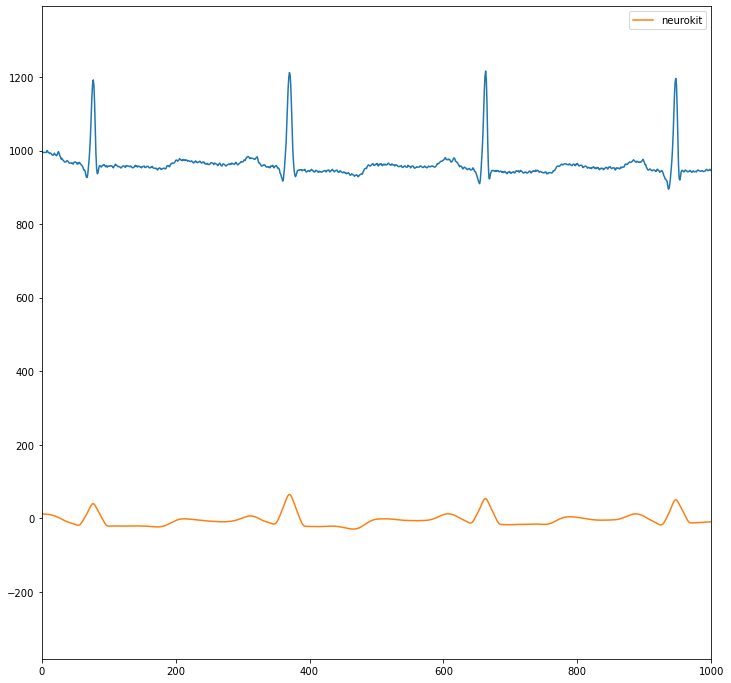

In [6]:
#compare different cleaning method
cleaned_ecg = nk.ecg_clean(ecg_signal, sampling_rate=1000, method='neurokit')#used
#cleaned_ecg3 = nk.ecg_clean(ecg_signal, sampling_rate=1000, method='pantompkins1985')
#cleaned_ecg4 = nk.ecg_clean(ecg_signal, sampling_rate=1000, method='hamilton2002')
#cleaned_ecg5 = nk.ecg_clean(ecg_signal, sampling_rate=1000, method='elgendi2010')
#cleaned_ecg6 = nk.ecg_clean(ecg_signal, sampling_rate=1000, method='engzeemod2012')

plt.figure(figsize = [12, 12])
plt.plot(test_file["\'sample #\'"], ecg_signal)
plt.plot(test_file["\'sample #\'"], cleaned_ecg, label = 'neurokit')
'''
plt.plot(test_file["\'sample #\'"], cleaned_ecg2, label = 'biosppy')
plt.plot(test_file["\'sample #\'"], cleaned_ecg3, label = 'pantompkins1985')
plt.plot(test_file["\'sample #\'"], cleaned_ecg4, label = 'hamilton2002')
plt.plot(test_file["\'sample #\'"], cleaned_ecg5, label = 'elgendi2010')
plt.plot(test_file["\'sample #\'"], cleaned_ecg6, label = 'engzeemod2012')
'''
plt.legend()
#plt.xlim(322500, 325000)
plt.xlim(0, 1000)
plt.show()


In [7]:
#heart beat extraction
events = rpeak
epochs = nk.epochs_create(ecg_signal, events, sampling_rate=360, epochs_start=-0.4, epochs_end=0.4)
print(type(epochs))


<class 'dict'>
[   370    662    946 ... 649484 649734 649991]


In [8]:
features = nk.ecg_analyze(epochs, sampling_rate=360, method='auto', subepoch_rate=[None, None])
features.columns = ['beat_number', 'ECG_R_Peaks']
print(features)

C:\Users\Joyce Mao\anaconda3\lib\site-packages\neurokit2\epochs\eventrelated_utils.py:81: NeuroKitWarning: Input does not have an `ECG_Rate` column. Will skip all rate-related features.
  warn(
C:\Users\Joyce Mao\anaconda3\lib\site-packages\neurokit2\ecg\ecg_eventrelated.py:147: NeuroKitWarning: Input does not have an `ECG_Phase_Artrial` or `ECG_Phase_Ventricular` column. Will not indicate whether event onset concurs with cardiac phase.
  warn(
C:\Users\Joyce Mao\anaconda3\lib\site-packages\neurokit2\ecg\ecg_eventrelated.py:170: NeuroKitWarning: Input does not have an `ECG_Quality` column. Quality of the signal is not computed.
  warn(


     beat_number  ECG_R_Peaks
1              1          370
2              2          662
3              3          946
4              4         1231
5              5         1515
...          ...          ...
2268        2268       648978
2269        2269       649232
2270        2270       649484
2271        2271       649734
2272        2272       649991

[2272 rows x 2 columns]


In [27]:
#extract features

dataframe, QRS = nk.ecg_delineate(cleaned_ecg, rpeaks=rpeak[1:], sampling_rate=360, method='cwt', show=False, check=False)
print(dataframe)
print(QRS)

        ECG_P_Onsets  ECG_P_Peaks  ECG_P_Offsets  ECG_Q_Peaks  ECG_R_Onsets  \
0                  0            0              0            0             0   
1                  0            0              0            0             0   
2                  0            0              0            0             0   
3                  0            0              0            0             0   
4                  0            0              0            0             0   
...              ...          ...            ...          ...           ...   
649995             0            0              0            0             0   
649996             0            0              0            0             0   
649997             0            0              0            0             0   
649998             0            0              0            0             0   
649999             0            0              0            0             0   

        ECG_R_Offsets  ECG_S_Peaks  ECG_T_Onsets  E

In [ ]:
features['ECG_Q_Peaks'] = QRS['ECG_Q_Peaks']
features['ECG_S_Peaks'] = QRS['ECG_S_Peaks']
features['ECG_P_Peaks'] = QRS['ECG_P_Peaks']
features['ECG_P_Onsets'] = QRS['ECG_P_Onsets']
features['ECG_P_Offsets'] = QRS['ECG_P_Offsets']
features['ECG_T_Peaks'] = QRS['ECG_T_Peaks']
features['ECG_T_Onsets'] = QRS['ECG_T_Onsets']
features['ECG_T_Offsets'] = QRS['ECG_T_Offsets']
features['ECG_R_Onsets'] = QRS['ECG_R_Onsets']
features['ECG_R_Offsets'] = QRS['ECG_R_Offsets']

In [25]:
print(features) #there're lots of nan for the first beat
#need cleaning for nan values

     beat_number  ECG_R_Peaks  ECG_Q_Peaks  ECG_S_Peaks  ECG_P_Peaks  \
1              1          370        347.0        467.0        313.0   
2              2          662        641.0        697.0        608.0   
3              3          946        926.0        971.0        888.0   
4              4         1231       1210.0       1323.0       1170.0   
5              5         1515       1493.0       1609.0       1456.0   
...          ...          ...          ...          ...          ...   
2268        2268       648978     648957.0     649020.0     648924.0   
2269        2269       649232     649211.0     649321.0     649173.0   
2270        2270       649484     649463.0     649544.0     649426.0   
2271        2271       649734     649712.0     649757.0     649680.0   
2272        2272       649991          NaN          NaN          NaN   

      ECG_P_Onsets  ECG_T_Peaks  ECG_T_Offsets  
1            292.0          NaN            NaN  
2            586.0        789.0      

In [ ]:
#p peaks illustration
plt.plot(test_file["\'sample #\'"], test_file["\'MLII\'"])
plt.xlim(0, 1000)
for i in np.arange(1, 10, 1):
    number1 = int(features.iloc[i, 4])
    
    plt.scatter(int(number1), float(ecg_signal[number1]), color = 'red')
 

In [ ]:
#illustration of detected features
plt.plot(test_file["\'sample #\'"], test_file["\'MLII\'"]) #this is the raw signal
plt.xlim(0, 1000)
#plot feature points on the raw signal
for i in np.arange(1, 1873, 1):
    number1 = int(features.iloc[i, 4])
    number2 = int(features.iloc[i, 5])
    number3 = int(features.iloc[i, 6])
    number4 = int(features.iloc[i, 7])
    number5 = int(features.iloc[i, 8])
    number6 = int(features.iloc[i, 9])
    number7 = int(features.iloc[i, 1])
    number8 = int(features.iloc[i, 2])
    number9 = int(features.iloc[i, 3])
    number10 = int(features.iloc[i, 10])
    number11 = int(features.iloc[i, 11])

    plt.scatter(number1 , ecg_signal[number1], color = 'red') 
    plt.scatter(number2, ecg_signal[number2], color = 'blue')
    plt.scatter(number3, ecg_signal[number3], color = 'green')
    plt.scatter(number4, ecg_signal[number4], color = 'orange')
    plt.scatter(number5, ecg_signal[number5], color = 'black')
    plt.scatter(number6, ecg_signal[number6], color = 'violet')
    plt.scatter(number7 , ecg_signal[number7], color = 'm')
    plt.scatter(number8, ecg_signal[number8], color = 'grey')
    plt.scatter(number9, ecg_signal[number9], color = 'brown')
    plt.scatter(number10, ecg_signal[number10], color = 'y')
    plt.scatter(number11, ecg_signal[number11], color = 'c')
#plt.xlim(320000, 330000)

In [ ]:
#feature extraction using raw ecg
dataframe, QRS = nk.ecg_delineate(ecg_signal, rpeaks=rpeak[1:], sampling_rate=360, method='dwt', show=False, show_type='all', check=False)
features['ECG_Q_Peaks'] = QRS['ECG_Q_Peaks']
features['ECG_S_Peaks'] = QRS['ECG_S_Peaks']
features['ECG_P_Peaks'] = QRS['ECG_P_Peaks']
features['ECG_P_Onsets'] = QRS['ECG_P_Onsets']
features['ECG_P_Offsets'] = QRS['ECG_P_Offsets']
features['ECG_T_Peaks'] = QRS['ECG_T_Peaks']
features['ECG_T_Onsets'] = QRS['ECG_T_Onsets']
features['ECG_T_Offsets'] = QRS['ECG_T_Offsets']
features['ECG_R_Onsets'] = QRS['ECG_R_Onsets']
features['ECG_R_Offsets'] = QRS['ECG_R_Offsets']
plt.plot(test_file["\'sample #\'"], test_file["\'MLII\'"]) #this is the raw signal
plt.xlim(0, 1000)
#plot feature points on the raw signal
for i in np.arange(1, 1873, 1):
    number1 = int(features.iloc[i, 4])
    number2 = int(features.iloc[i, 5])
    number3 = int(features.iloc[i, 6])
    number4 = int(features.iloc[i, 7])
    number5 = int(features.iloc[i, 8])
    number6 = int(features.iloc[i, 9])
    number7 = int(features.iloc[i, 1])
    number8 = int(features.iloc[i, 2])
    number9 = int(features.iloc[i, 3])
    number10 = int(features.iloc[i, 10])
    number11 = int(features.iloc[i, 11])

    plt.scatter(number1 , ecg_signal[number1], color = 'red') 
    plt.scatter(number2, ecg_signal[number2], color = 'blue')
    plt.scatter(number3, ecg_signal[number3], color = 'green')
    plt.scatter(number4, ecg_signal[number4], color = 'orange')
    plt.scatter(number5, ecg_signal[number5], color = 'black')
    plt.scatter(number6, ecg_signal[number6], color = 'violet')
    plt.scatter(number7 , ecg_signal[number7], color = 'm')
    plt.scatter(number8, ecg_signal[number8], color = 'grey')
    plt.scatter(number9, ecg_signal[number9], color = 'brown')
    plt.scatter(number10, ecg_signal[number10], color = 'y')
    plt.scatter(number11, ecg_signal[number11], color = 'c')
#plt.xlim(320000, 330000)